In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Rutas de las imágenes a cargar
image_paths = [
    'bariloche2/B1.tif',
    'bariloche2/B2.tif',
    'bariloche2/B3.tif',
    'bariloche2/B4.tif',
    'bariloche2/B5.tif'
]

# Función para aplicar la corrección gamma
def apply_gamma_correction(image, gamma):
    # Normalizar la imagen al rango [0, 1]
    normalized_img = image / 255.0
    # Aplicar la transformación de potencia
    gamma_corrected = np.power(normalized_img, gamma)
    # Escalar de vuelta al rango [0, 255]
    gamma_corrected = np.uint8(gamma_corrected * 255)
    return gamma_corrected

# Valores de γ para probar
gamma_values = [0.5, 0.8, 1.2, 1.5]

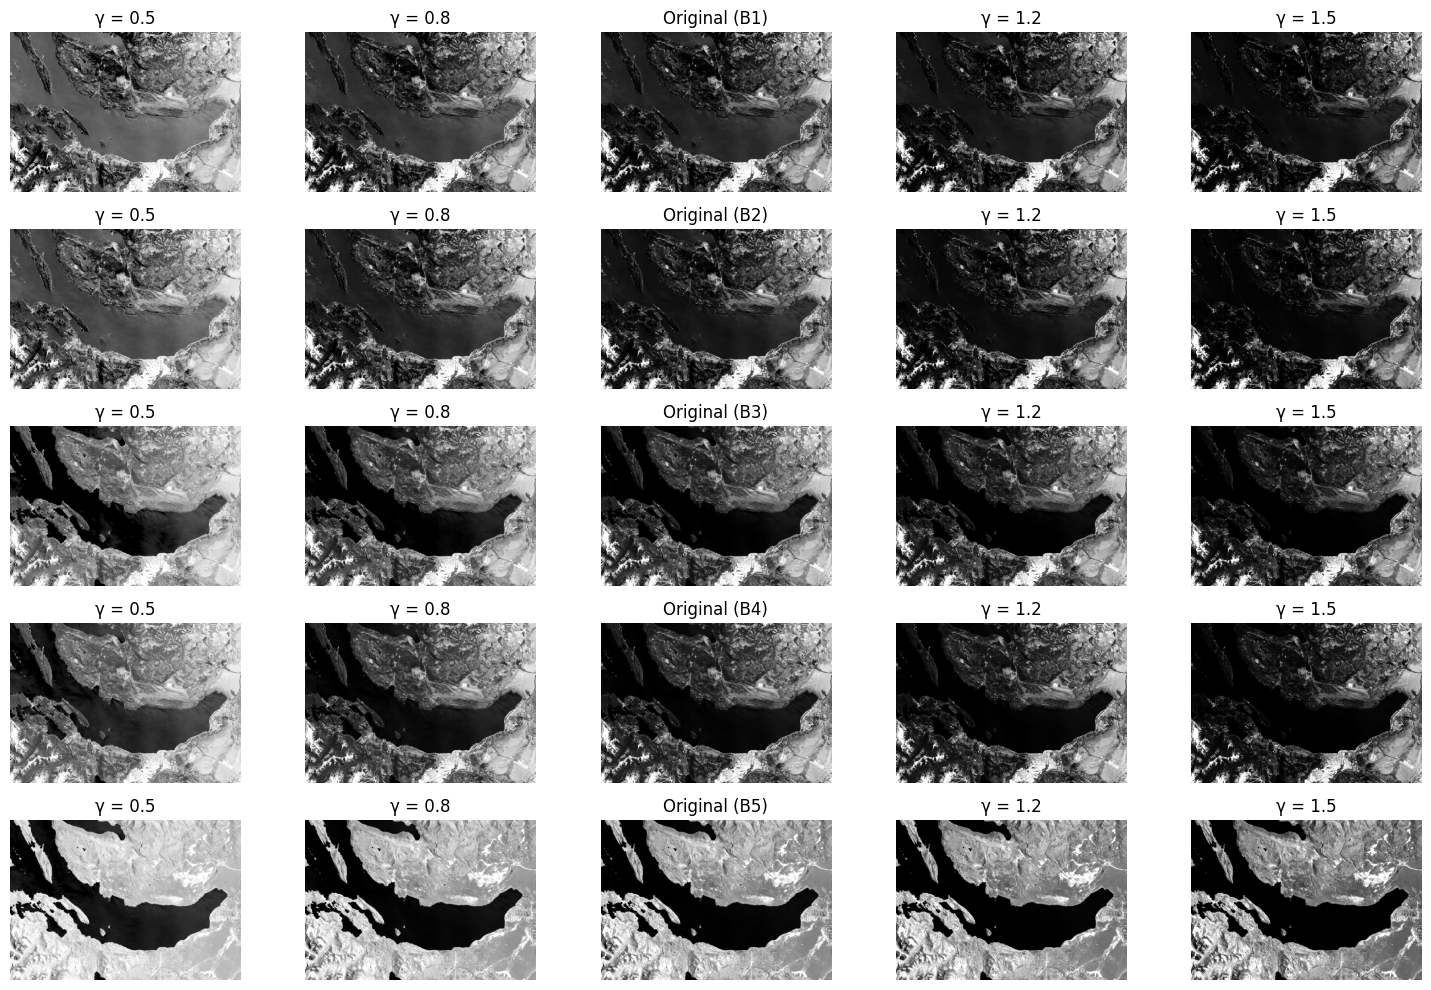

In [4]:
# Procesar y mostrar cada imagen con diferentes valores de γ
plt.figure(figsize=(15, 10))
for idx, image_path in enumerate(image_paths):
    # Cargar la imagen en niveles de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error al cargar la imagen {image_path}.")
        continue

    # Definir el índice central para colocar la imagen original
    center_index = len(gamma_values) // 2 + 1

    for i, gamma in enumerate(gamma_values):
        gamma_corrected_img = apply_gamma_correction(image, gamma)
        col_index = i if i < center_index - 1 else i + 1
        plt.subplot(len(image_paths), len(gamma_values) + 1, idx * (len(gamma_values) + 1) + col_index + 1)
        plt.imshow(gamma_corrected_img, cmap='gray')
        plt.title(f"γ = {gamma}")
        plt.axis("off")

    # Mostrar la imagen original en el centro
    plt.subplot(len(image_paths), len(gamma_values) + 1, idx * (len(gamma_values) + 1) + center_index)
    plt.imshow(image, cmap='gray')
    plt.title(f"Original (B{idx+1})")
    plt.axis("off")

plt.tight_layout()
plt.show()